In [1]:
## FCR price analysis

In [2]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for fancy plots

#so that  the graphs are displayed in the Jupyter notebook
%matplotlib inline    

#to prevent warnings to be displayed
import warnings
warnings.filterwarnings('ignore')

# to increase the width of the graphs
plt.rcParams['figure.figsize']=8,4

In [4]:
# Import excel file stored in the GitHub repository folder
df1 = pd.read_excel('/Users/silvia.donazar/GitHub_repository/fcr-price-analisys/FCR Mimer results D1&D2 01.01.2022-31.01.2024.xlsx', parse_dates=["Datetime"])

In [40]:
# Import excel file stored locally
#df1 = pd.read_excel('/Users/silvia.donazar/Documents/VET/Python/Python excel files/FCR Mimer results D1&D2 01.01.2022-31.01.2024.xlsx', parse_dates=["Datetime"])

In [5]:
df1.head()

,Datetime,FCRD_upp_price_D2,Total_FCRD_upp_D2,SE1_FCRD_upp_D2,SE2_FCRD_upp_D2,SE3_FCRD_upp_D2,SE4_FCRD_upp_D2,DK2_FCRD_upp_D2,FCRD_upp_price_D1,Total_FCRD_upp_D1,SE1_FCRD_upp_D1,SE2_FCRD_upp_D1,SE3_FCRD_upp_D1,SE4_FCRD_upp_D1,DK2_FCRD_upp_D1
0,2022-01-01 00:00:00,49.18715,453.3,260.2,145.5,11.8,3.4,32.4,1.95478,260.2,5.8,10.3,0.0,0.0,0.0
1,2022-01-01 01:00:00,49.33709,451.8,260.1,145.5,11.7,3.4,31.1,1.95492,260.1,5.9,0.0,0.0,0.0,0.0
2,2022-01-01 02:00:00,49.71026,459.3,275.6,145.5,11.7,3.4,23.1,1.96262,275.6,6.1,0.0,0.0,0.0,0.0
3,2022-01-01 03:00:00,49.45940,450.1,275.7,136.5,11.4,3.4,23.1,1.96222,275.7,6.3,0.0,0.0,0.0,0.0
4,2022-01-01 04:00:00,49.52272,450.7,276.3,136.5,11.4,3.4,23.1,1.95644,276.3,4.5,0.0,0.0,0.0,0.0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           18264 non-null  datetime64[ns]
 1   FCRD_upp_price_D2  18264 non-null  float64       
 2   Total_FCRD_upp_D2  18264 non-null  float64       
 3   SE1_FCRD_upp_D2    18264 non-null  float64       
 4   SE2_FCRD_upp_D2    18264 non-null  float64       
 5   SE3_FCRD_upp_D2    18264 non-null  float64       
 6   SE4_FCRD_upp_D2    18264 non-null  float64       
 7   DK2_FCRD_upp_D2    18264 non-null  float64       
 8   FCRD_upp_price_D1  18264 non-null  float64       
 9   Total_FCRD_upp_D1  18264 non-null  float64       
 10  SE1_FCRD_upp_D1    18264 non-null  float64       
 11  SE2_FCRD_upp_D1    18264 non-null  float64       
 12  SE3_FCRD_upp_D1    18264 non-null  float64       
 13  SE4_FCRD_upp_D1    18264 non-null  float64       
 14  DK2_FC

In [43]:
df1["Datetime"].min(), df1["Datetime"].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2024-01-31 23:00:00'))

In [44]:
df1["Datetime"].max()-df1["Datetime"].min()

Timedelta('760 days 23:00:00')

In [60]:
#Define Datetime as index - this enables correct x-axis visualisation and use of "resample" function
#Note: it is necessary to reload original excel file and remove the index to use "groupby" function though
df1.set_index('Datetime', inplace=True)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18264 entries, 2022-01-01 00:00:00 to 2024-01-31 23:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FCRD_upp_price_D2  18264 non-null  float64
 1   Total_FCRD_upp_D2  18264 non-null  float64
 2   SE1_FCRD_upp_D2    18264 non-null  float64
 3   SE2_FCRD_upp_D2    18264 non-null  float64
 4   SE3_FCRD_upp_D2    18264 non-null  float64
 5   SE4_FCRD_upp_D2    18264 non-null  float64
 6   DK2_FCRD_upp_D2    18264 non-null  float64
 7   FCRD_upp_price_D1  18264 non-null  float64
 8   Total_FCRD_upp_D1  18264 non-null  float64
 9   SE1_FCRD_upp_D1    18264 non-null  float64
 10  SE2_FCRD_upp_D1    18264 non-null  float64
 11  SE3_FCRD_upp_D1    18264 non-null  float64
 12  SE4_FCRD_upp_D1    18264 non-null  float64
 13  DK2_FCRD_upp_D1    18264 non-null  float64
dtypes: float64(14)
memory usage: 2.1 MB


# Volumes

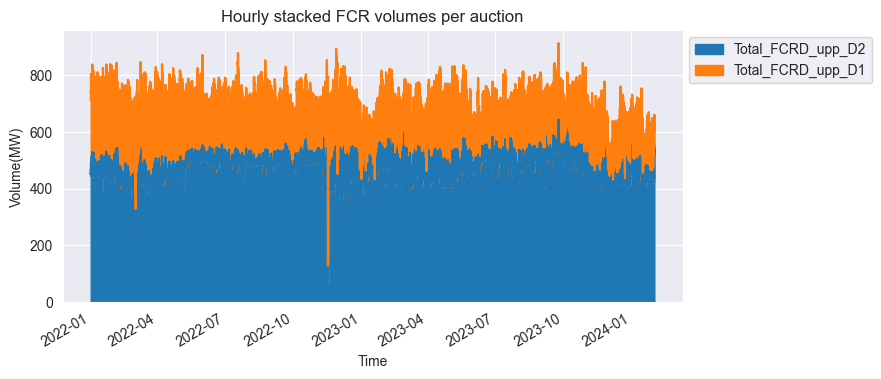

In [47]:
# Stacked volumes

# WHY SUM(Volumes_per_auction) <> SUM(Volumes_per_area) ??? check!

Volumes_per_auction = df1[['Total_FCRD_upp_D2', 'Total_FCRD_upp_D1']]

Volumes_per_auction.plot.area()
plt.title("Hourly stacked FCR volumes per auction")
plt.ylabel("Volume(MW)")
plt.xlabel("Time")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

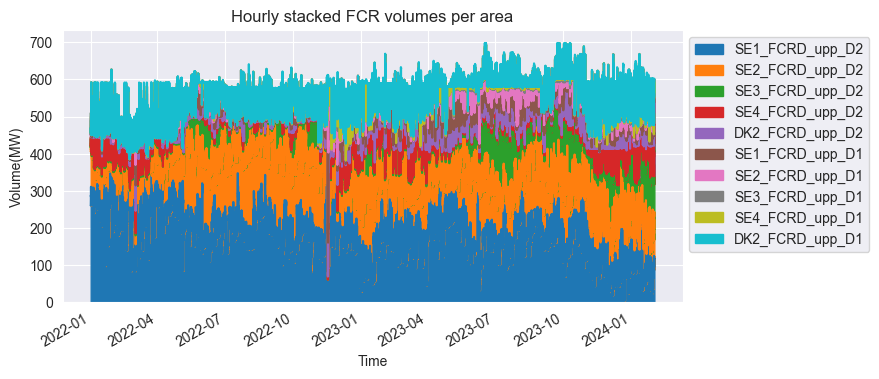

In [48]:
# Stacked volumes

# Volumes per area = df1 excluding (prices, total_volumes_per_aucton)
Volumes_per_area = df1.drop(['FCRD_upp_price_D2', 'FCRD_upp_price_D1','Total_FCRD_upp_D2','Total_FCRD_upp_D1'], axis=1)

Volumes_per_area.plot.area()
plt.title("Hourly stacked FCR volumes per area")
plt.ylabel("Volume(MW)")
plt.xlabel("Time")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

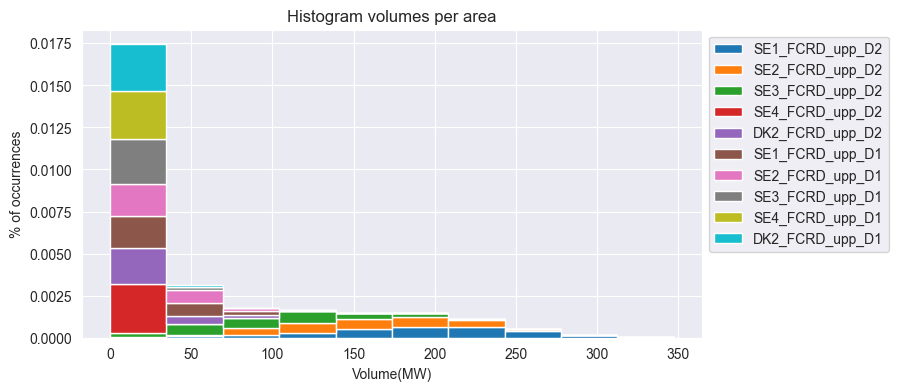

In [49]:
#Histogram

plt.hist(Volumes_per_area, label=["SE1_FCRD_upp_D2","SE2_FCRD_upp_D2","SE3_FCRD_upp_D2", "SE4_FCRD_upp_D2","DK2_FCRD_upp_D2","SE1_FCRD_upp_D1", "SE2_FCRD_upp_D1","SE3_FCRD_upp_D1", "SE4_FCRD_upp_D1", "DK2_FCRD_upp_D1"], density=True, histtype='bar', stacked=True)
plt.title("Histogram volumes per area")
plt.ylabel("% of occurrences")
plt.xlabel("Volume(MW)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

Per auction: the largest volumes are procured in D2. 
Per area: from largest to smallest provided volumes: SE1, SE2, SE3, SE4.

# Prices development

In [50]:
# Add column Delta_price_D2_D1 = price_D2-price_D1
Delta_price_D1_D2 =df1.FCRD_upp_price_D1 - df1.FCRD_upp_price_D2
df1['Delta_price_D1_D2'] = Delta_price_D1_D2

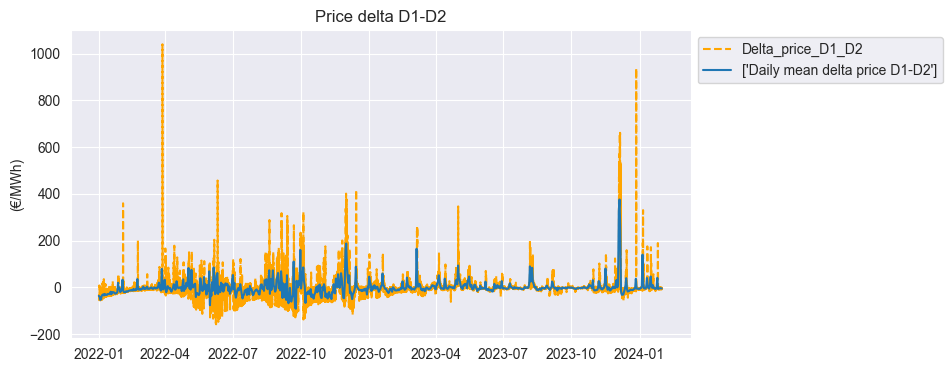

In [51]:
#plot hourly Delta

plt.plot(df1['Delta_price_D1_D2'], c='Orange', ls='--', ms=5, label=columns[0])
prices_delta_mean_d = df1['Delta_price_D1_D2'].resample('D').mean()
plt.plot(prices_delta_mean_d, label= ["Daily mean delta price D1-D2"])

plt.title("Price delta D1-D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
# xlabel="€", ylabel="Date"
plt.show()

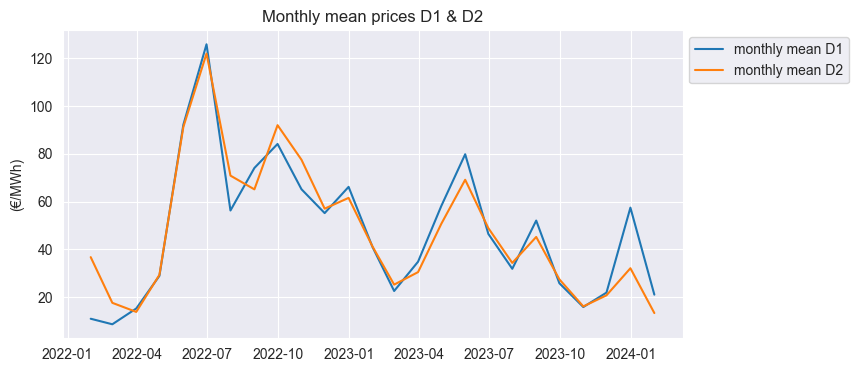

In [52]:
# plot monthly mean values for each auction D1 & D2
# Create New DataFrame Using Multiple Columns from Old DataFrame
prices= df1[['FCRD_upp_price_D1', 'FCRD_upp_price_D2']].copy()

#Monthly avg prices
prices_mean_m = prices.resample('M').mean()
plt.plot(prices_mean_m, label= ["monthly mean D1", "monthly mean D2"])

plt.title("Monthly mean prices D1 & D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["daily", "monthly"], loc='upper left')
plt.show()

Prices have been dropping over time.<br> Since 2023 D1 prices are higher than D2's. Specially in Jan2023

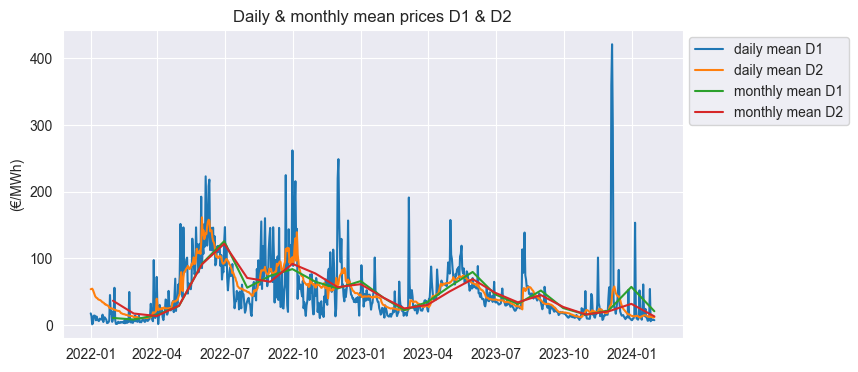

In [53]:
# plot daily mean values for each auction D1 & D2
# Create New DataFrame Using Multiple Columns from Old DataFrame
prices= df1[['FCRD_upp_price_D1', 'FCRD_upp_price_D2']].copy()

prices_mean_d = prices.resample('D').agg(['mean'])
plt.plot(prices_mean_d, label=["daily mean D1", "daily mean D2"])

#Monthly avg prices
prices_mean_m = prices.resample('M').mean()
plt.plot(prices_mean_m, label= ["monthly mean D1", "monthly mean D2"])

plt.title("Daily & monthly mean prices D1 & D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["daily", "monthly"], loc='upper left')
plt.show()

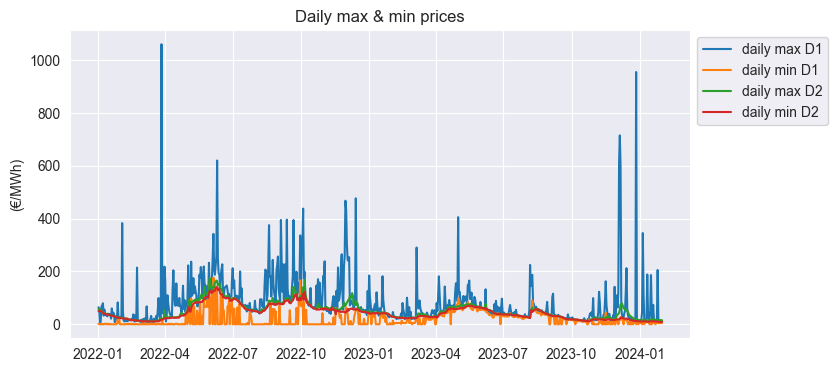

In [54]:
# plot max/ min of every 24 hours for each auction D1 & D2 for the whole timeframe

prices_maxmin_d = prices.resample('D').agg(['max', 'min'])
plt.plot(prices_maxmin_d, label=["daily max D1", "daily min D1", "daily max D2", "daily min D2"])

plt.title("Daily max & min prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

D1 higher volatility whithin-day. <br> Since 2023 clearly more upward than downward potential D1. <br>
D2 less volatile, lower risk.

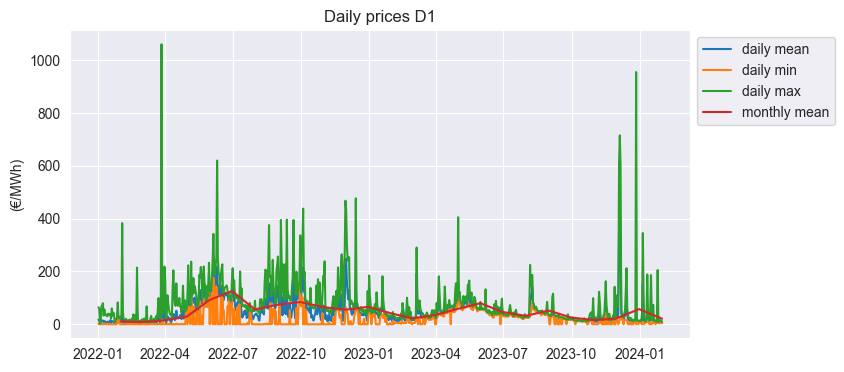

In [55]:
# plot daily max/ min for D1 for the whole timeframe

df1_prices_d = df1['FCRD_upp_price_D1'].resample('D').agg(['mean', 'min', 'max'])
plt.plot(df1_prices_d, label=["daily mean", "daily min", "daily max"])

#Monthly avg prices
df1_prices_mean_m = df1['FCRD_upp_price_D1'].resample('M').mean()
plt.plot(df1_prices_mean_m, label= "monthly mean")

plt.title("Daily prices D1")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

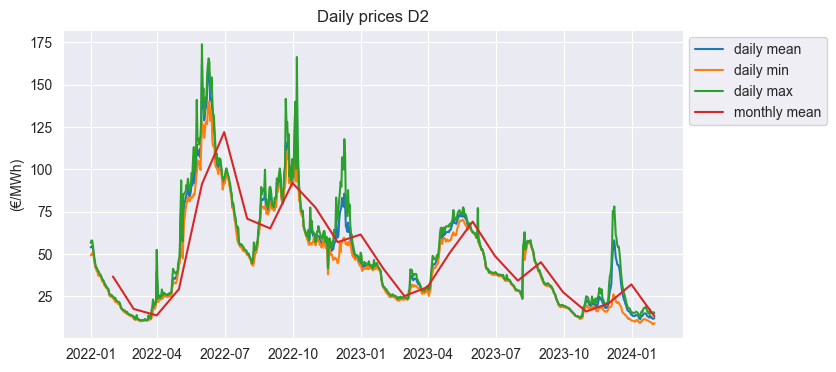

In [56]:
# plot daily max/ min for D2 for the whole timeframe

df1_prices_d = df1['FCRD_upp_price_D2'].resample('D').agg(['mean', 'min', 'max'])
plt.plot(df1_prices_d, label=["daily mean", "daily min", "daily max"])

#Monthly avg prices
df1_prices_mean_m = df1['FCRD_upp_price_D2'].resample('M').mean()
plt.plot(df1_prices_mean_m, label= "monthly mean")

plt.title("Daily prices D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

## Prices grouped by hours/ days/ month

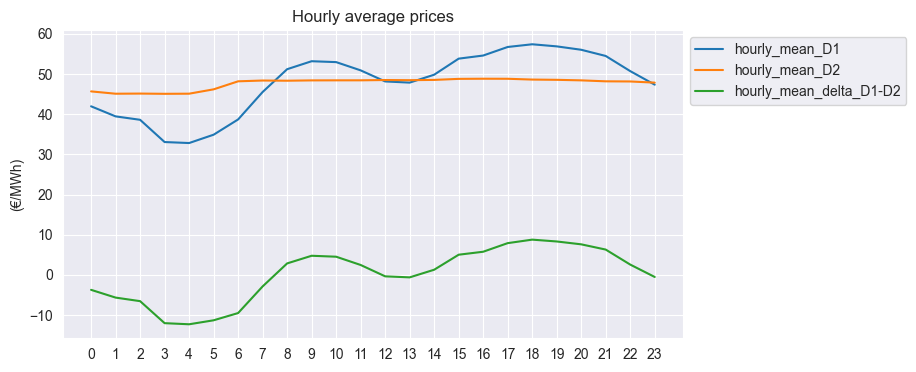

In [57]:
# Need to restore Datetime as a column instead of index to use groupby function
df1 = pd.read_excel('/Users/silvia.donazar/Documents/VET/Python/Python excel files/FCR Mimer results D1&D2 01.01.2022-31.01.2024.xlsx', parse_dates=["Datetime"])
# Again add column Delta_price_D2_D1 = price_D2-price_D1
Delta_price_D1_D2 =df1.FCRD_upp_price_D1 - df1.FCRD_upp_price_D2
df1['Delta_price_D1_D2'] = Delta_price_D1_D2

# https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/09_timeseries.html
hourly_mean_D1=df1.groupby([df1["Datetime"].dt.hour])["FCRD_upp_price_D1"].mean()
hourly_mean_D2=df1.groupby([df1["Datetime"].dt.hour])["FCRD_upp_price_D2"].mean()
hourly_mean_delta_D1_D2=df1.groupby([df1["Datetime"].dt.hour])["Delta_price_D1_D2"].mean()

plt.plot(hourly_mean_D1, label='hourly_mean_D1')
plt.plot(hourly_mean_D2, label='hourly_mean_D2')
plt.plot(hourly_mean_delta_D1_D2, label='hourly_mean_delta_D1-D2')

sns.set_style("darkgrid") # this adds the grid
plt.title("Hourly average prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
#plt.grid()
import numpy as np # necessary to call the np.arange function
plt.xticks(np.arange(0, 24, 1))
plt.show()

It seems better to bid on D2 until H9 and on D1 for the rest of the day;

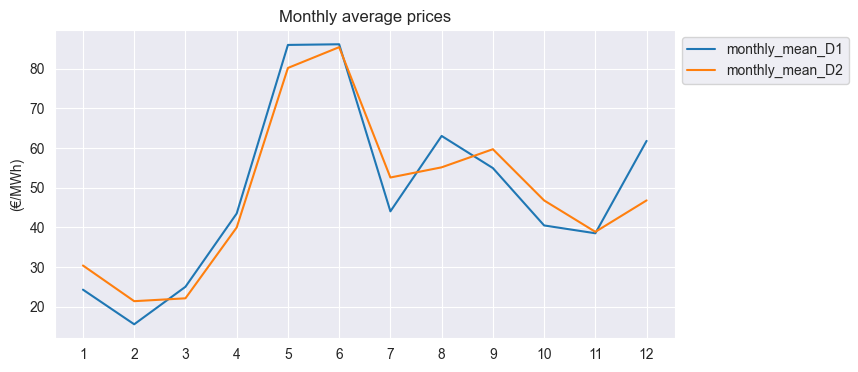

In [58]:
# What is the monthly average price for each auction D1 & D2?
monthly_mean_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].mean()
monthly_mean_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].mean()


plt.plot(monthly_mean_D1, label='monthly_mean_D1')
plt.plot(monthly_mean_D2, label='monthly_mean_D2')

plt.title("Monthly average prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(1, 13, 1))
plt.show()

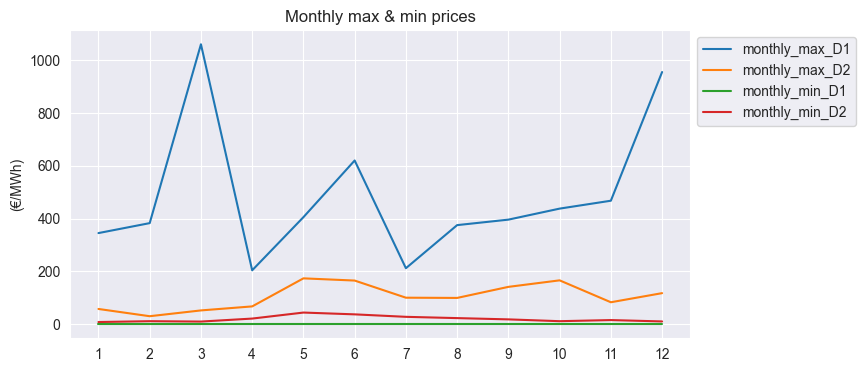

In [59]:
# What is the monthly average price for each auction D1 & D2?
monthly_max_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].max()
monthly_max_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].max()
monthly_min_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].min()
monthly_min_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].min()

plt.plot(monthly_max_D1, label='monthly_max_D1')
plt.plot(monthly_max_D2, label='monthly_max_D2')
plt.plot(monthly_min_D1, label='monthly_min_D1')
plt.plot(monthly_min_D2, label='monthly_min_D2')

plt.title("Monthly max & min prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(1, 13, 1))
plt.show()